# Linear Regression

Ordinary Least Squares

## Setup

$$\mathcal D = \{(x_i,y_i) \}_{i=1} ^n s.t$$

$$  \mathcal D \sim_{i.i.d} \mathbb P(\mathcal X , \mathcal Y), 
\mathcal X \subseteq \mathbb R^d \text{ and } \mathcal Y \in \mathbb R$$

## Assumption

$$ \forall (x_i,y_i) \in \mathcal D : \exists \vec w \in \mathbb R^d s.t.$$

$$ y_i = \vec w x_i + \epsilon_i \text{ where } \epsilon \sim \mathcal N (\vec 0, \sigma^2)$$


Equivalently,


$$ y_i \sim \mathcal N(\vec w ^T x_i, \sigma^2)$$



We assume that the residual residual error $\epsilon$ has a Gaussian distribution

We would like to model probability of output takes a specific value via Gaussian distirbution
$$ \mathbb P (y_i | x_i; \vec w) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp\Big(- \frac{(w^T x_i - y_i)^2}{2\sigma^2} \Big)$$

# Estimate $(w,b)$ via MLE

**Setup** Maximize the conditional likelihood of $\mathcal D$.


### 1. $ argmax_{w} \mathbb P (\mathcal D ;w)$
__Find $w$ that maximize the likelihood of seeing the data__


### 2. $ argmax_{w} \prod_{i=1} ^n \mathbb P (x_i,y_i ; w)$
__Data $\mathcal D $ is sampled i.i.d.__

### 3. $ argmax_{w} \prod_{i=1} ^n \mathbb P (y_i | x_i; w) \mathbb P (x_i;w) $
__Apply the conditional probability__

### 4. $ argmax_{w} \prod_{i=1} ^n \mathbb P (y_i | x_i;w)$
__Probability of an input $\mathbb P (x_i;w)$ is constant__


### 5. $ argmax_{w} \prod_{i=1} ^n \mathbb P (y_i | x_i; w)$


### 6. $ argmax_{w} log\Big(\prod_{i=1} ^n \mathbb P (y_i | x_i;w) \Big)$
__Instead of computing product of probabilities, compute sum of log probabilities__

### 7. $ argmax_{w} \sum_{i=1} ^n log(\mathbb P (y_i | x_i;w))  $
__Distribute the log__



### 8. $argmax_w \sum_i ^n \log \Big(\frac{1}{\sqrt{2 \pi \sigma^2}} exp\Big(- \frac{(w^T x_i - y_i)^2}{2\sigma^2} \Big)\Big)$

### 9. $argmax_w \sum_i ^n \log \Big(\frac{1}{\sqrt{2 \pi \sigma^2}}\Big) + \log \Big(exp\Big(- \frac{(w^T x_i - y_i)^2}{2\sigma^2} \Big)$

### 10. $argmax_w \sum_i ^n \log \Big(exp\Big(- \frac{(w^T x_i - y_i)^2}{2\sigma^2} \Big)$

The first term is a constant. Stating the obvious, if adding a constant to a function does not its maximum.


### 11. $argmax_w \sum_i ^n - \frac{(w^T x_i - y_i)^2}{2\sigma^2}$

Log(exp(x))=x

### 12. $argmin_w \frac{1}{n}\sum_i ^n (w^T x_i - y_i)^2$

+ The denominator is a constant.
+ Instead of maximize, minimize it.
+ Add $\frac{1}{n}$ to make the loss interpretable
__This is our objective. Squared loss__

# Finding Closed Form Solution

### 1. $ \mathcal L(w)=(Xw -Y)^2 = (Xw - Y)^T (Xw - Y)$
__Our objective in matrix notation__

### 2. $w^TX^TXw - 2Y^TXw + Y^T Y$
__Completing the square__



### 3. $\frac{\partial \mathcal L(w)}{\mathcal w} = 2 X^TXw- 2X^T Y$
__Take the deriative of the loss w.r.t. $w$__


### 4. $2 X^TXw- 2X^T Y=0$
__Set the derivative to zero__


### 5. $2X^TXw= 2X^T Y$


### 6. $X^TXw= X^T Y$

### 7. $w= (X^TX)^{-1} X^T Y $

__The closed form solution for linear regression__

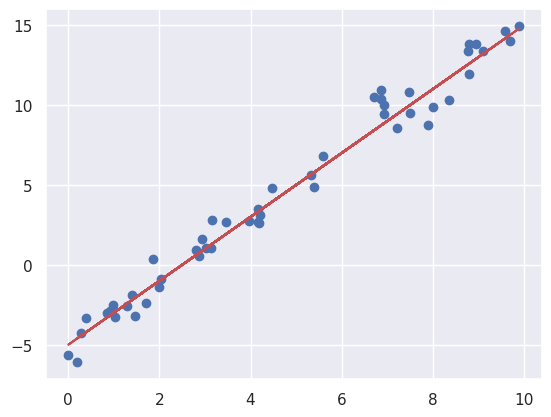

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

rng = np.random.RandomState(1)
X = 10 * rng.rand(50)
Y = 2 * X - 5 + rng.randn(50)
plt.scatter(X, Y)
plt.plot(X, 2 * X - 5,c='r')

179.7089222425298
3.4904031921879777


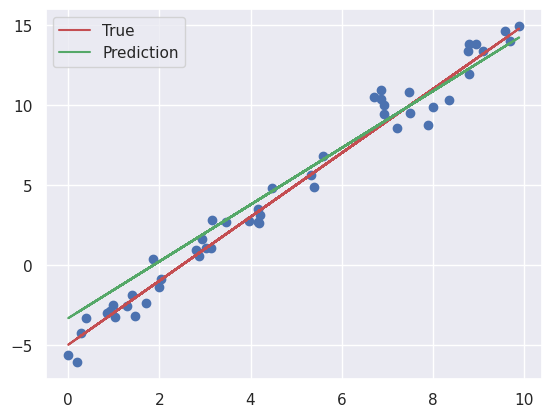

In [2]:
w=np.random.randn(1)
b=np.random.randn(1)

for i in range(200):
    Y_hat=X*w+b
    
    sqrt_loss=((Y_hat-Y)**2).mean()
    # Derivative of loss w.r.t. predictions
    dloss=2*(Y_hat-Y)
    # Derivative of loss w.r.t. parameters 
    dw=(dloss*X)
    db=dloss
    
    # GRADIENT CHECKING
    # Gradients must be negative, i.e., decreasing w would increase the loss
    assert np.alltrue(dw[Y_hat<Y])
    # Gradients must be positive, i.e., decreasing w would increase the loss
    assert np.alltrue(dw[Y_hat>Y])
    
    w -= .01*dw.mean()
    b -= .01*db.mean()
    if i%100==0:
        print(sqrt_loss)
        
plt.scatter(X, Y)
plt.plot(X, 2*X-5,c='r',label='True')
plt.plot(X, X*w+b,c='g',label='Prediction')
plt.legend()

In [3]:
w,b

(array([1.77574172]), array([-3.33819412]))

## Estimate $(w,b)$ via MAP


**Setup** Consider $w$ as a random variable: $ \mathbb P(w | \mathcal D) = \mathbb P(w | X,y) \propto \mathbb P(y | X,w) \mathbb P(w)$


### 1 $ w = argmax_{w} \mathbb P ( w | \mathcal D) $

### 2. $ argmax_{w} \frac{\mathbb P (\mathcal D | w) \mathbb P(w)}{\mathbb P(\mathcal D)}$
Apply Bayes Rule

### 3. $ argmax_{w} \mathbb P (\mathcal D | w) \mathbb P(w)$
$\mathbb P(\mathcal D)$ is a constant


### 4. $ argmax_{w} \Big[\prod_{i=1} ^n P (x_i,y_i | w) \Big] \mathbb P(w)$
$\mathcal D = {(x_i,y_i)}_{i=1} ^n$

### 5. $ argmax_{w} \Big[\prod_{i=1} ^n \mathbb P (y_i | x_i, w) \mathbb P (x_i| w) \Big] \mathbb P(w)$

Apply Chain Rule

### 6. $ argmax_{w} \Big[\prod_{i=1} ^n \mathbb P (y_i | x_i, w) \mathbb P (x_i) \Big] \mathbb P(w)$

$\mathbb P (x_i)$ does not depend on $w$.


### 7. $ argmax_{w} \Big[\prod_{i=1} ^n \mathbb P (y_i | x_i, w) \Big] \mathbb P(w)$

$\mathbb P (x_i)$ is constant


### 8. $ argmax_{w} log\Big(\Big[\prod_{i=1} ^n \mathbb P (y_i | x_i, w) \Big] \mathbb P(w) \Big)$
Take the log

### 9. $ argmax_{w} \Big[\sum_{i=1} ^n log(\mathbb P (y_i | x_i, w)) \Big] + log(\mathbb P(w)) $
Distribute the log. The first part is exactly same as in MLE. Let's focus on the second term





$$ \mathbb P (\vec w) = \frac{1}{\sqrt{2 \pi \tau^2}} exp\Big(- \frac{\vec w^T \vec w}{2\tau^2} \Big)$$

$\mathbb P (\vec w)$ has Gaussian distribution around $\vec 0$ mean.

### 10. $argmin_w \sum_i ^n (w^T x_i - y_i)^2 + \lambda w^T w$
where $\lambda=\frac{1}{2\tau}$

__Our objective squared loss with l2 normalization__

[102.54304694]
[10.16335247]


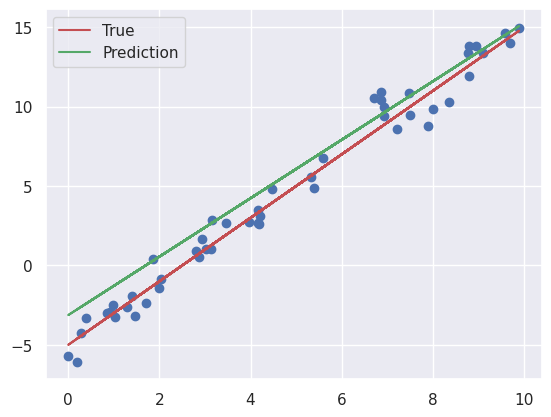

In [4]:
w=np.random.randn(1)
b=np.random.randn(1)

for i in range(200):
    Y_hat=X*w+b
    
    sqrt_loss=((Y_hat-Y)**2).mean() + w*w + b*b
    # Derivative of loss w.r.t. predictions
    dloss=2*(Y_hat-Y) + w + b
    # Derivative of loss w.r.t. parameters 
    dw=(dloss*X)
    db=dloss
    
    # GRADIENT CHECKING
    # Gradients must be negative, i.e., decreasing w would increase the loss
    assert np.alltrue(dw[Y_hat<Y])
    # Gradients must be positive, i.e., decreasing w would increase the loss
    assert np.alltrue(dw[Y_hat>Y])
    
    w -= .01*dw.mean()
    b -= .01*db.mean()
    if i%100==0:
        print(sqrt_loss)
        
plt.scatter(X, Y)
plt.plot(X, 2*X-5,c='r',label='True')
plt.plot(X, X*w+b,c='g',label='Prediction')
plt.legend()

In [5]:
w

array([1.84051506])

In [6]:
b

array([-3.12706985])

## Kernels come to rescue if the dataset is not linear
Go to section 6 Kernalization :)